In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [29]:
df=pd.read_csv('framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [30]:
df.shape

(4238, 16)

In [31]:
df.dropna(inplace=True)

In [32]:
X=df.drop('currentSmoker',axis=1)
y=df['currentSmoker']
X

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


<AxesSubplot:>

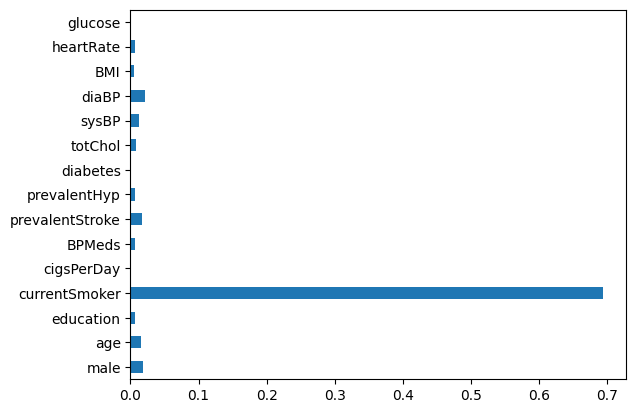

In [15]:
from sklearn.feature_selection import mutual_info_classif,SelectPercentile,SelectKBest,chi2,VarianceThreshold
inform=mutual_info_classif(X,y,random_state=42)
fited=pd.Series(inform,df.columns[0:len(df.columns)-1])
fited.plot(kind='barh')


## Information Gain only used in Classification Problems  

In [8]:
X.astype(int)

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,195,106,70,26,80,77,0
1,0,46,2,0,0,0,0,0,250,121,81,28,95,76,0
2,1,48,1,20,0,0,0,0,245,127,80,25,75,70,0
3,0,61,3,30,0,0,1,0,225,150,95,28,65,103,1
4,0,46,3,23,0,0,0,0,285,130,84,23,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3,0,0,0,1,0,187,141,81,24,80,81,0
4232,1,68,1,0,0,0,1,0,176,168,97,23,60,79,1
4233,1,50,1,1,0,0,1,0,313,179,92,25,66,86,1
4234,1,51,3,43,0,0,0,0,207,126,80,19,65,68,0


In [16]:
chi=SelectKBest(chi2,k=5)
red_fea=-chi.fit_transform(X,y)

print('Original size: ',X.shape[1])
print('Reduced row: ',red_fea.shape[1])

Original size:  15
Reduced row:  5


## Chi-square Test cannot work on negative values

<AxesSubplot:>

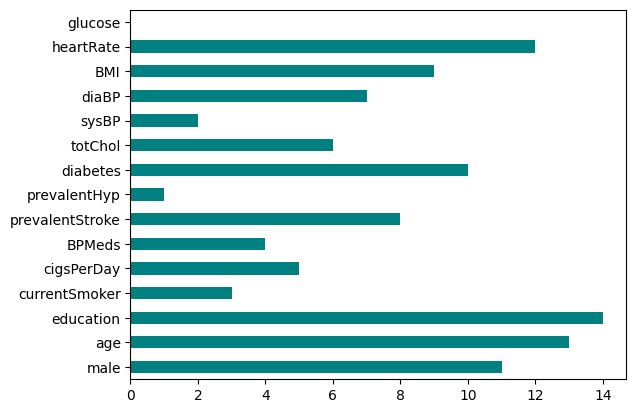

In [10]:
from skfeature.function.similarity_based import fisher_score
inform=fisher_score.fisher_score(X.to_numpy(),y.to_numpy(),mode='rank')
fited=pd.Series(inform,df.columns[0:len(df.columns)-1])
fited.plot(kind='barh',color='teal')

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()

###  Without Feature Selection using Fisher's Score

In [37]:
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9277899343544858

In [38]:
x=X.drop('glucose',axis=1)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24)

###  With Feature Selection using Fisher's Score

In [40]:
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)
accuracy_score(y_test,y_pred_svc)

0.9288840262582057

## Fisher Score only works on numpy which can or can't be a problem
# but can be works well on regression model and negative datas.

<AxesSubplot:>

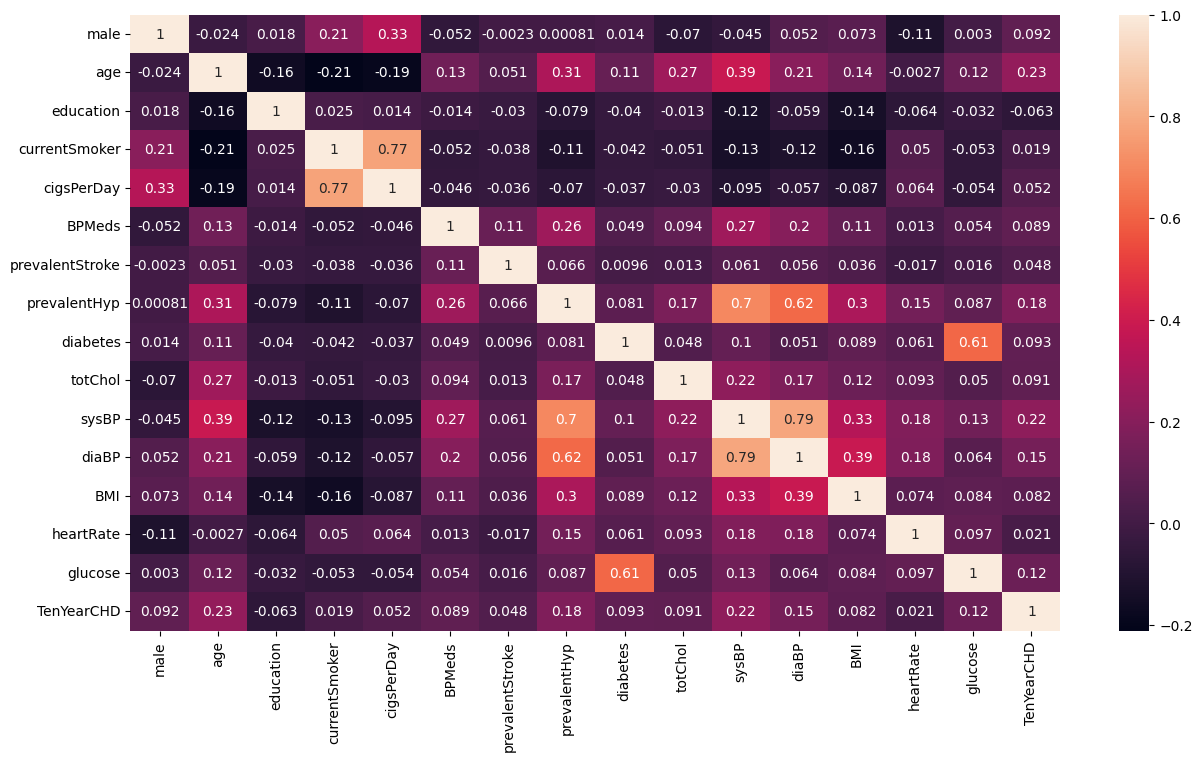

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [45]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
corr_out=correlation(X,0.65)
corr_out

{'diaBP', 'sysBP'}

In [61]:
x1=X.drop(corr_out,axis=1)
X.shape[1],x1.shape[1]

(15, 13)

In [55]:
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9277899343544858

In [56]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=24)

In [57]:
svc.fit(x1_train,y_train)
y_pred_svc=svc.predict(x1_test)
accuracy_score(y_test,y_pred_svc)

0.9277899343544858

In [70]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [71]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [73]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]

print(len(constant_columns))

0


# As always very useful

<BarContainer object of 15 artists>

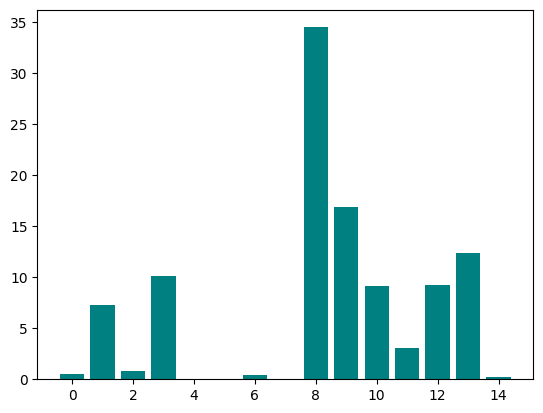

In [12]:
mean_absolute_difference=np.sum(np.abs(X -np.mean(X,axis=0)),axis=0)/X.shape[0]
plt.bar(np.arange(X.shape[1]),mean_absolute_difference,color='teal')

## Mean Absolute Difference can be used in scaling too.

C:\Python310\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


<BarContainer object of 15 artists>

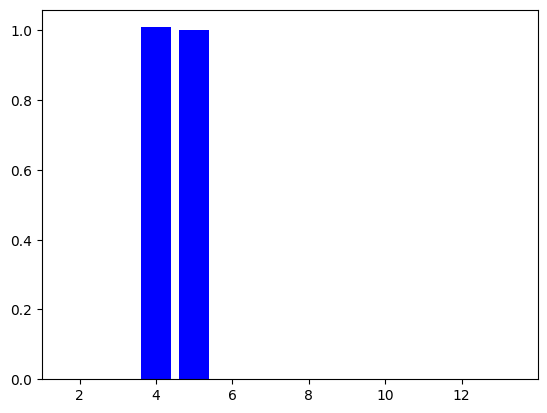

In [13]:
x=X+1 # too avoid denominator to be zero
#Arithmetic Mean
am=np.mean(x,axis=0)
#Geometric Mean 
gm=np.power(np.prod(x,axis=0),1/x.shape[0])
#ratio of arithmetic mean  and geometric mean
disp_ratio=am/gm
plt.bar(np.arange(X.shape[1]),disp_ratio,color='blue')

## Dispersion Ratio works great and useful in many cases.

# Wrappers Methods:

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

## Forward Feature Selection

In [95]:
from  mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(knn,k_features=4,forward=True,floating=True,verbose=2,scoring='accuracy',cv=0)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.7s finished

[2022-09-24 12:45:01] Features: 1/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.8s finished

[2022-09-24 12:45:05] Features: 2/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | el

In [77]:
features=list(sfs1.k_feature_names_)
features

['male', 'education', 'cigsPerDay', 'BPMeds']

In [78]:
print('\nSequential Forward Floating Selection (k=3):')
print(sfs1.k_feature_idx_)
print('CV Score:')
print(sfs1.k_score_)


Sequential Forward Floating Selection (k=3):
(0, 2, 3, 4)
CV Score:
1.0


In [80]:
features=list(map(str,features))
knn.fit(X[features],y)
y_pred=knn.predict(X[features])
accuracy_score(y,y_pred)

1.0

## Backward Feature Selection

In [96]:
from  mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs2 = sfs(knn,k_features=4,forward=False,floating=True,verbose=2,scoring='accuracy',cv=0)

sfs2 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.9s finished

[2022-09-24 12:45:24] Features: 1/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.6s finished

[2022-09-24 12:45:29] Features: 2/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | el

In [97]:
features=list(sfs2.k_feature_names_)
features

['male', 'education', 'cigsPerDay', 'BPMeds']

In [98]:
print('\nSequential Forward Floating Selection (k=3):')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential Forward Floating Selection (k=3):
(0, 2, 3, 4)
CV Score:
1.0


In [99]:
features=list(map(str,features))
knn.fit(X[features],y)
y_pred=knn.predict(X[features])
accuracy_score(y,y_pred)

1.0

## There is a High probabality to give same output ,but the using and applying the algorithm in both are different

## Exhaustive Feature Selection

In [6]:
from  mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
from sklearn.ensemble import RandomForestClassifier

In [ ]:
efs1 = efs(RandomForestClassifier(), 
           min_features=3,
           max_features=10,
           scoring='roc_auc',
           cv=2)
efs1=efs1.fit(X, y)
features=X.columns[list(efs1.best_idx)]
features

In [ ]:
efs1.best_score

## Recursive Feature Elimination

In [101]:
from sklearn.feature_selection import RFE

In [ ]:
rfe=RFE(knn,n_features_to_select=8)
rfe.fit(X,y)
y_pred=rfe.predict(X)

## Recursive Feature Elimination is done with the model used of machine learning ,Definately faster and less complicated,but can only be used in regression model

# Embedded Methods:

# LASSO Regularization(L1) for regression

In [114]:
from sklearn.feature_selection import SelectFromModel
knm=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
model=SelectFromModel(knm)
model = model.fit(x, y) 
status = model.get_support()
print("Selection status: ", status)

## Random Forest Importance

In [116]:
model=RandomForestClassifier(n_estimators=400)

<AxesSubplot:>

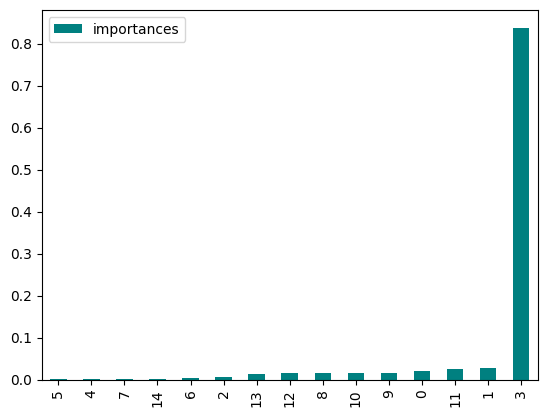

In [119]:
model.fit(X,y)
importance=model.feature_importances_
final_df=pd.DataFrame({'Feature':pd.DataFrame(X).columns,'importances':importance})
final_df.set_index('importances')
final_df=final_df.sort_values('importances')
final_df.plot.bar(color='teal')

## Used for classification shows importances

# Feature Extraction 

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3', 'PC4','PC5'])
PCA_df

,PC1,PC2,PC3,PC4,PC5
0,-46.695941,-16.081999,13.952566,-2.190518,12.915671
1,11.264227,-11.431487,4.270364,6.061628,21.881165
2,6.219053,-14.390937,-2.844144,8.123984,-6.342047
3,-6.969397,29.911630,-1.894393,7.089465,-24.624723
4,46.988768,-6.721115,8.255238,17.195466,-2.240330
...,...,...,...,...,...
3651,-47.066698,13.534403,-11.298807,-6.081119,8.790658
3652,-52.733193,33.011677,-35.949064,-20.304990,-9.812629
3653,82.637013,20.757425,-22.327496,-12.851597,-8.866256
3654,-31.831517,-12.656986,-6.336320,18.736494,-27.878383


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier
knn = KNeighborsClassifier()
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [39]:

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(PCA_df,y,test_size=0.25,random_state=24)

In [44]:

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9452954048140044

In [46]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3656 samples in 0.025s...
[t-SNE] Computed neighbors for 3656 samples in 0.545s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3656
[t-SNE] Computed conditional probabilities for sample 2000 / 3656
[t-SNE] Computed conditional probabilities for sample 3000 / 3656
[t-SNE] Computed conditional probabilities for sample 3656 / 3656
[t-SNE] Mean sigma: 10.677102
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.545998
[t-SNE] KL divergence after 300 iterations: 1.983160
t-SNE done! Time elapsed: 19.838878870010376 seconds
